In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-istagram-detection-dataset/insta_test.csv
/kaggle/input/fake-istagram-detection-dataset/insta_train.csv


In [3]:
# 📦 Basic libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 ML + Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 📦 Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 📊 Plot style
sns.set(style="whitegrid")


In [4]:
# 📂 Load the datasets
train_df = pd.read_csv("/kaggle/input/fake-istagram-detection-dataset/insta_train.csv")
test_df = pd.read_csv("/kaggle/input/fake-istagram-detection-dataset/insta_test.csv")

# 🔍 Preview
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (576, 12)
Test shape: (120, 12)


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


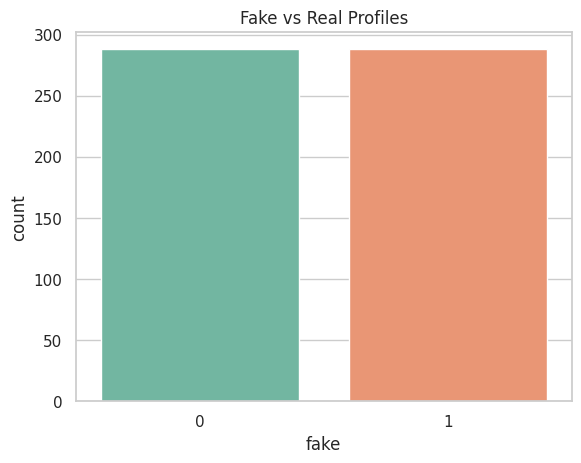

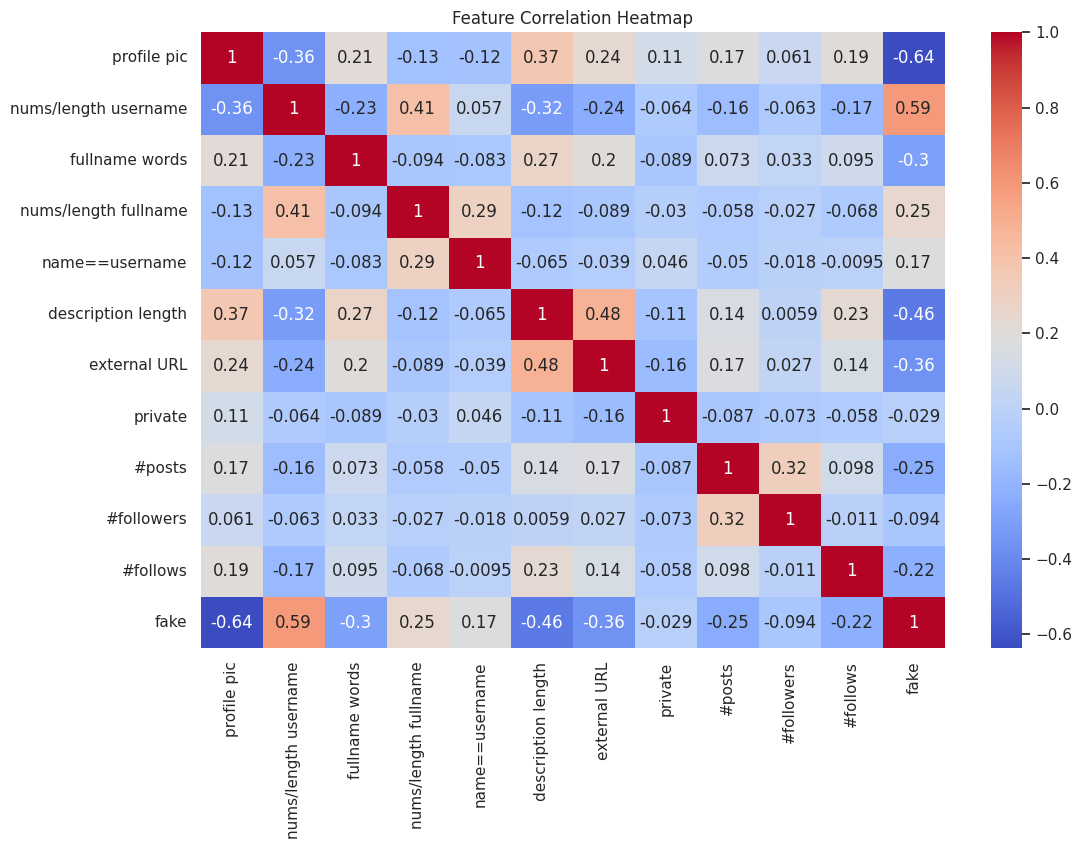

In [5]:
# Count real vs fake profiles
sns.countplot(x='fake', data=train_df, palette='Set2')
plt.title("Fake vs Real Profiles")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Replace 0s with 1 to avoid log(0)
train_df["#followers"] = train_df["#followers"].replace(0, 1)
train_df["#follows"] = train_df["#follows"].replace(0, 1)
train_df["#posts"] = train_df["#posts"].replace(0, 1)

# Add log-transformed columns
train_df["log_followers"] = np.log10(train_df["#followers"])
train_df["log_follows"] = np.log10(train_df["#follows"])
train_df["log_posts"] = np.log10(train_df["#posts"])


In [7]:
# Drop original skewed features
X = train_df.drop(columns=["#followers", "#follows", "#posts", "fake"])
y = train_df["fake"]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-07 04:57:12.231747: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5060 - loss: 0.7013 - val_accuracy: 0.8017 - val_loss: 0.5881
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7875 - loss: 0.5584 - val_accuracy: 0.8707 - val_loss: 0.4842
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8614 - loss: 0.4658 - val_accuracy: 0.8534 - val_loss: 0.3902
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9295 - loss: 0.3265 - val_accuracy: 0.8707 - val_loss: 0.3267
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9036 - loss: 0.2767 - val_accuracy: 0.8879 - val_loss: 0.2917
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9320 - loss: 0.2373 - val_accuracy: 0.8966 - val_loss: 0.2709
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9253 - loss: 0.2227 - val_accuracy: 0.8966 - val_loss: 0.2579
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9404 - loss: 0.2013 - val_accuracy: 0.9138 - val_loss: 0.2486
Ep

In [11]:
from sklearn.metrics import accuracy_score

# Predict on validation set
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels

# 🎯 Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Validation Accuracy: 0.9224


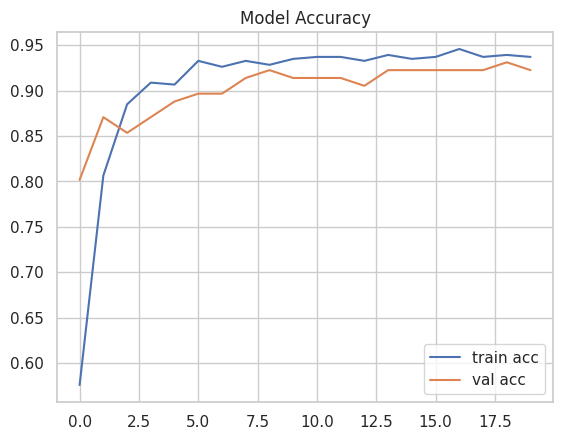

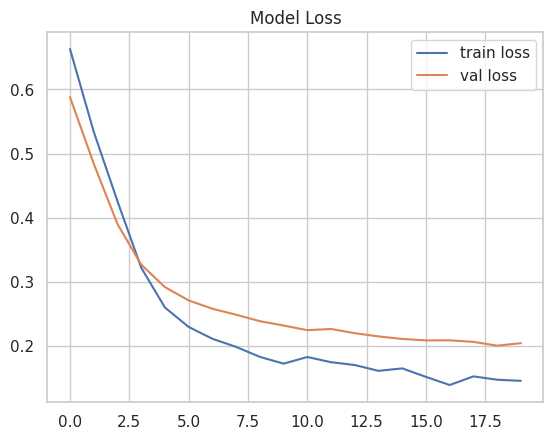

In [9]:
# Accuracy and loss plot
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        63
           1       0.96      0.87      0.91        53

    accuracy                           0.92       116
   macro avg       0.93      0.92      0.92       116
weighted avg       0.93      0.92      0.92       116



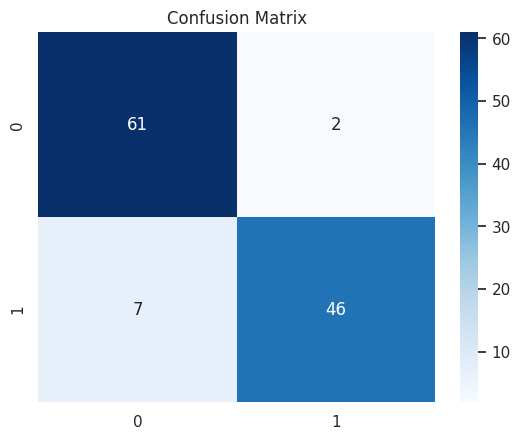

In [10]:
# Predict
y_pred = (model.predict(X_val) > 0.5).astype(int)

# Report
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
